In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
import math
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
crime_2 = pd.read_csv('NYC_Offenses_2014.csv')

In [3]:
crime_2.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,"by City, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,nan
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,nan


In [4]:
# delete rows :3

crime_2 = crime_2.drop(crime_2.index[[0, 1, 2, 3]])

In [5]:
# delete last 7 rows

crime_2 = crime_2.drop(crime_2.index[[369, 370, 371, 372, 373, 374, 375]])

In [6]:
# view column names

crime_2.columns

Index(['Table 8', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [7]:
# rename columns

crime_2 = crime_2.rename(columns={'Table 8' : 'city', 'Unnamed: 1' : 'population', 'Unnamed: 2' : 'violent_crime',
                              'Unnamed: 3' : 'murder', 'Unnamed: 4' : 'rape_revised', 'Unnamed: 5' : 'rape',
                              'Unnamed: 6' :'robbery', 'Unnamed: 7' : 'aggravated_assault',
                              'Unnamed: 8' : 'property_crime','Unnamed: 9' : 'burglary', 'Unnamed: 10' : 'larceny',
                              'Unnamed: 11' : 'vehicle_theft', 'Unnamed: 12' : 'arson', 'Unnamed: 13' : 'empty'})

In [8]:
# drop pop_sq column from dataset

crime_2 = crime_2.drop('empty', 1)

In [9]:
# remove commas from columns

crime_2 = crime_2.replace(',','', regex=True)

In [10]:
# verify columns renamed, commas removed & empty column dropped

crime_2.head()

,city,population,violent_crime,murder,rape_revised,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft,arson
4,Adams Village,1851,0,0,NaN,0,0,0,11,1,10,0,0
5,Addison Town and Village,2568,2,0,NaN,0,1,1,49,1,47,1,0
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0
7,Akron Village,2842,1,0,NaN,0,0,1,17,0,17,0,0
8,Albany4,98595,802,8,54,NaN,237,503,3888,683,3083,122,12


In [11]:
# verify last 7 rows dropped from table

crime_2.tail()

,city,population,violent_crime,murder,rape_revised,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft,arson
368,Woodbury Town4 5,10739,4,0,0,NaN,1,3,NaN,5,NaN,0,0
369,Woodstock Town4,5907,3,0,1,NaN,2,0,43,14,29,0,0
370,Yonkers4,200624,974,3,33,NaN,358,580,2009,414,1395,200,15
371,Yorktown Town4,36989,13,0,0,NaN,0,13,209,24,182,3,0
372,Youngstown Village4,1896,0,0,0,NaN,0,0,1,0,1,0,0


In [12]:
crime_2['population'].describe()

count      369
unique     366
top       1429
freq         2
Name: population, dtype: object

In [13]:
# change population column from object to float

crime_2['population'] = crime_2['population'].astype(float)
crime_2['population'].describe()

count       369.000
mean      37814.824
std      441159.058
min          79.000
25%        2631.000
50%        6581.000
75%       15408.000
max     8473938.000
Name: population, dtype: float64

In [14]:
crime_2 = crime_2[crime_2.population < (np.percentile(crime_2.population, 75))]

In [15]:
crime_2['population'].describe()

count     276.000
mean     5281.518
std      3848.133
min        79.000
25%      2177.500
50%      4018.500
75%      7925.000
max     15242.000
Name: population, dtype: float64

In [16]:
# change property crime column from object to float

crime_2['property_crime'] = crime_2['property_crime'].astype(float)
crime_2['property_crime'].describe()

count    275.000
mean      89.960
std      127.068
min        0.000
25%       17.000
50%       44.000
75%      113.000
max     1090.000
Name: property_crime, dtype: float64

In [17]:
# change robbery column from object to float

crime_2['robbery'] = crime_2['robbery'].astype(float)
crime_2['robbery'].describe()

count   276.000
mean      1.301
std       2.878
min       0.000
25%       0.000
50%       0.000
75%       1.000
max      23.000
Name: robbery, dtype: float64

In [18]:
# change murder column from object to float

crime_2['murder'] = crime_2['murder'].astype(float)
crime_2['murder'].describe()

count   276.000
mean      0.040
std       0.214
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       2.000
Name: murder, dtype: float64

In [19]:
# change violent crime column from object to float

crime_2['violent_crime'] = crime_2['violent_crime'].astype(float)
crime_2['violent_crime'].describe()

count   276.000
mean      6.667
std      11.203
min       0.000
25%       0.000
50%       2.000
75%       8.000
max      75.000
Name: violent_crime, dtype: float64

In [20]:
# change rape_revised def column from object to float

crime_2['rape_revised'] = crime_2['rape_revised'].astype(float)
crime_2['rape_revised'].describe()

count   159.000
mean      1.447
std       2.652
min       0.000
25%       0.000
50%       1.000
75%       2.000
max      18.000
Name: rape_revised, dtype: float64

In [21]:
# drop rape_revised column from dataset

crime_2 = crime_2.drop('rape_revised', 1)

In [22]:
# change rape column from object to float

crime_2['rape'] = crime_2['rape'].astype(float)
crime_2['rape'].describe()

count   117.000
mean      0.000
std       0.000
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       0.000
Name: rape, dtype: float64

In [23]:
# change aggravated assault column from object to float

crime_2['aggravated_assault'] = crime_2['aggravated_assault'].astype(float)
crime_2['aggravated_assault'].describe()

count   276.000
mean      4.493
std       7.579
min       0.000
25%       0.000
50%       2.000
75%       6.000
max      48.000
Name: aggravated_assault, dtype: float64

In [24]:
# change burglary column from object to float

crime_2['burglary'] = crime_2['burglary'].astype(float)
crime_2['burglary'].describe()

count   276.000
mean     14.069
std      19.855
min       0.000
25%       2.000
50%       7.000
75%      17.250
max     132.000
Name: burglary, dtype: float64

In [25]:
# change larceny column from object to float

crime_2['larceny'] = crime_2['larceny'].astype(float)
crime_2['larceny'].describe()

count   275.000
mean     73.927
std     107.815
min       0.000
25%      12.000
50%      37.000
75%      91.000
max     950.000
Name: larceny, dtype: float64

In [26]:
# change vehicle theft column from object to float

crime_2['vehicle_theft'] = crime_2['vehicle_theft'].astype(float)
crime_2['vehicle_theft'].describe()

count   276.000
mean      1.924
std       2.845
min       0.000
25%       0.000
50%       1.000
75%       3.000
max      16.000
Name: vehicle_theft, dtype: float64

In [27]:
# change arson column from object to float

crime_2['arson'] = crime_2['arson'].astype(float)
crime_2['arson'].describe()

count   274.000
mean      0.303
std       0.851
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       6.000
Name: arson, dtype: float64

In [28]:
# drop arson column

crime_2 = crime_2.drop('arson', 1)

In [29]:
# verify rape_revised & arson columns dropped from dataset

crime_2.head()

,city,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny,vehicle_theft
4,Adams Village,1851.000,0.000,0.000,0.000,0.000,0.000,11.000,1.000,10.000,0.000
5,Addison Town and Village,2568.000,2.000,0.000,0.000,1.000,1.000,49.000,1.000,47.000,1.000
6,Afton Village4,820.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000
7,Akron Village,2842.000,1.000,0.000,0.000,0.000,1.000,17.000,0.000,17.000,0.000
9,Albion Village4,5872.000,26.000,0.000,nan,2.000,21.000,204.000,41.000,159.000,4.000


In [30]:
crime_2 = crime_2.drop_duplicates()

In [31]:
crime_2.isnull().sum()

city                    0
population              0
violent_crime           0
murder                  0
rape                  159
robbery                 0
aggravated_assault      0
property_crime          1
burglary                0
larceny                 1
vehicle_theft           0
dtype: int64

In [32]:
crime_2 = crime_2.dropna()

In [33]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'property_crime ~ burglary+larceny+robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_2).fit()

In [34]:
lm.params

Intercept   0.670
burglary    1.003
larceny     1.005
robbery     0.527
dtype: float64

In [35]:
lm.pvalues

Intercept   0.001
burglary    0.000
larceny     0.000
robbery     0.000
dtype: float64

In [36]:
lm.rsquared

0.99951481215122318

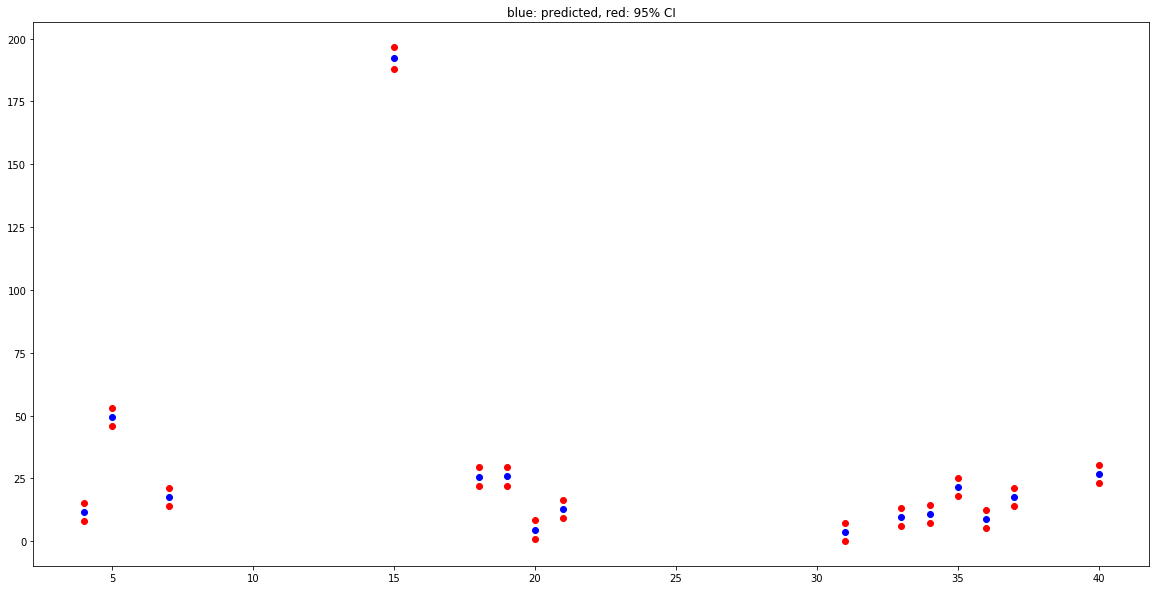

In [37]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [38]:
# Instantiate and fit model

regr = linear_model.LinearRegression()
Y = crime_2['property_crime'].values.reshape(-1, 1)
X = crime_2[['robbery','burglary','larceny']]
regr.fit(X, Y)

# Inspect the results

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.52716916  1.00308544  1.00486396]]

Intercept: 
 [ 0.67022694]

R-squared:
0.999514812151


In [39]:
data = crime_2[['burglary'] + ['larceny'] + ['robbery']]
target = crime_2['property_crime']

y_pred = regr.fit(data, target).predict(data)

In [40]:
print(data.shape)
f = len(data)
g = round(.20 * f)
h = round(.80 * f)
print(g)
print(h)
training_data = data[:h] 
training_target = target[:h]
testing_data = data[:-g]
testing_target = target[:-g]

y_pred = regr.fit(training_data, training_target).predict(testing_data)

(117, 3)
23
94


In [41]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(data, target).score(data, target)))

With 20% Holdout: 0.999640382839
Testing on Sample: 0.999514812151


In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, data, target, cv=10)

array([ 0.9963047 ,  0.99948272,  0.99955383,  0.99947223,  0.99980406,
        0.99952423,  0.99889762,  0.99816342,  0.99890504,  0.99907135])